# Winning a Kaggle Competition in Python - Part 1

> In this first chapter, you will get exposure to the Kaggle competition process. You will train a model and prepare a csv file ready for submission. You will learn the difference between Public and Private test splits, and how to prevent overfitting.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hai Nguyen
- categories: [Kaggle, Datacamp, Machine Learning, Python, EDA]
- image: images/winning_kaggle_p1.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


[**Download Datasets and Presentation slides for this post HERE**](https://github.com/anhhaibkhn/Data-Science-selfstudy-notes-Blog/tree/master/_notebooks/Winning%20a%20Kaggle%20Competition%20in%20Python)

##  Competitions overview

![Competition Overview](./images/competition_overview.png)

- Explore train and test data

![Competition Dataset](./images/taxi_dataset.png)

![Train and Test sets](./images/train_test.png)

![Competition submisison](./images/sample_submisison.png)



###  Explore Train Data

You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.

Your initial goal is to read the input data and take the first look at it.

Instructions:
- Import pandas as pd.
- Read train data using pandas' read_csv() method.
- Print the head of the train data (using head() method) to see the data sample.

In [6]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('datasets/demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
display(train.head())

Train shape: (15500, 5)


,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


Congratulations, you've gotten started with your first Kaggle dataset! It contains 15,500 daily observations of the sales data.

### Explore test data
Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your worksp

Instructions:
- Read the test dataset.
- Print the column names of the train and test datasets.
- Notice that test columns do not have the target "sales" column. Now, read the sample submission file.
- Look at the head of the submission file to get the output format.

In [7]:
import pandas as pd

# Read the test data
test = pd.read_csv('datasets\demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())
# Read the sample submission file
sample_submission = pd.read_csv('datasets\sample_submission.csv')

# Look at the head() of the sample submission
display(sample_submission.head() )

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


The sample submission file consists of two columns: id of the observation and sales column for your predictions. Kaggle will evaluate your predictions on the true sales data for the corresponding id. So, it’s important to keep track of the predictions by id before submitting them. Let’s jump in the next lesson to see how to prepare a submission file!

## Prepare for your first submission

![Competition Submission](./images/submission.png)

![Competition Dataset](./images/taxi_dataset2.png)

In [8]:
import pandas as pd

# Read train data
taxi_train = pd.read_csv('datasets/taxi_train_chapter_4.csv')
taxi_train.columns.to_list()

['id',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [9]:

# Read test data
taxi_test = pd.read_csv('datasets/taxi_test_chapter_4.csv')
taxi_test.columns.to_list()

['id',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

'fare_amount' column is missing in test data because this is the column that we are predicting.

- Problem Type

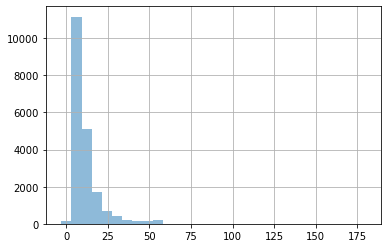

In [10]:
import matplotlib.pyplot as plt

# plot a histogram
taxi_train.fare_amount.hist(bins=30, alpha= 0.5)
plt.show()

As we see the fare_amount is a continued value, so we are dealing with the Regression problem.

- Build a model:

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
feature_cols = [   
                    'pickup_longitude',
                    'pickup_latitude',
                    'dropoff_longitude',
                    'dropoff_latitude',
                    'passenger_count'
                ]
                
lr.fit(X=taxi_train[feature_cols], y=taxi_train['fare_amount'])

# make predictions on the test data
taxi_test['fare_amount'] = lr.predict(taxi_test[feature_cols])


In [12]:
# read the sample submission file
taxi_sample_sub = pd.read_csv('datasets/taxi_sample_submission.csv')
taxi_sample_sub.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


In [14]:
taxi_test.head()

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,11.235023
1,1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,11.236369
2,2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,11.235279
3,3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,11.234863
4,4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,11.234457


> NOTE: Ignore the following cell, as we do not need to submit to the competition.

In [ ]:
# Prepare a submisison file
taxi_submission = taxi_test[['key','fare_amount']]

# save to .csv
taxi_submission.to_csv('first_sub.csv', index=False)

###  Determine a problem type
You will keep working on the Store Item Demand Forecasting Challenge. Recall that you are given a history of store-item sales data, and asked to predict 3 months of the future sales.

Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.

The train DataFrame is already available in your workspace. It has the target variable column called "sales". Also, matplotlib.pyplot is already imported as plt.



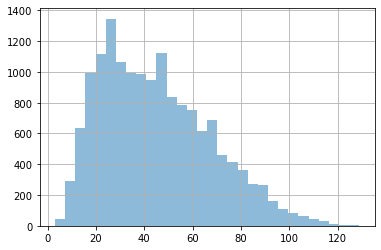

In [15]:
train.sales.hist(bins=30, alpha= 0.5)
plt.show()

That's correct! The sales variable is **continuous**, so you're solving a regression problem.

###  Train a simple model
As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.

You will use the RandomForestRegressor class from the scikit-learn library.

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.

Instructions:
- Read the train data using pandas.
- Create a Random Forest object.
- Train the Random Forest model on the "store" and "item" features with "sales" as a target.

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor()

### Prepare a submission
You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The rf object you created in the previous exercise is available in your workspace.

Note that starting from now and for the rest of the course, pandas library will be always imported for you and could be accessed as pd.

Instructions:
- Read "test.csv" and "sample_submission.csv" files using pandas.
- Look at the head of the sample submission to determine the format.
- Note that sample submission has id and sales columns. Now, make predictions on the test data using the rf model, that you fitted on the train data.
- Using the format given in the sample submission, write your results to a new file.

In [18]:
# Read test and sample submission data
test = pd.read_csv("datasets/taxi_test_chapter_4.csv")
sample_submission = pd.read_csv("datasets/sample_submission.csv")

# Show the head() of the sample_submission
display(sample_submission.head())


,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [ ]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

Congratulations! You've prepared your first Kaggle submission. Now, you could upload it to the Kaggle platform and see your score and current position on the Leaderboard. Move forward to learn more about the Leaderboard itself!

## Public vs Private Leaderboard

### Public vs Private Leaderboard


![Competition metrics](./images/competition_metrics.png)


![Test Split](./images//test_split.png)


![Leaders Board](./images/leaderboards.png)


![Over Fitting](./images/overfitting.png)

Prepare a submission

You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The rf object you created in the previous exercise is available in your workspace.

Note that starting from now and for the rest of the course, pandas library will be always imported for you and could be accessed as pd.

Instructions:
- Note that sample submission has id and sales columns. Now, make predictions on the test data using the rf model, that you fitted on the train data.
- Using the format given in the sample submission, write your results to a new file.

In [21]:
# Read test and sample submission data
test = pd.read_csv('./datasets/test.csv')
sample_submission = pd.read_csv('./datasets/sample_submission.csv')

# Show the head() of the sample_submission
display(sample_submission.head())

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [ ]:

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

### Train XGBoost models

Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:

max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
Instructions:
- Set the maximum depth to 2. Then hit Submit Answer button to train the first model.
- Now, set the maximum depth to 8. Then hit Submit Answer button to train the second model.
- Finally, set the maximum depth to 15. Then hit Submit Answer button to train the third model.

In [22]:
# load forcasting train data
df_full = pd.read_csv('datasets/train.csv')
# test = pd.read_csv('datasets/test.csv')

# Randomly use 30000 of your dataframe
df = df_full.sample(n=30000, random_state=1)

print(df.info())


from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.5, random_state=42)


import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])
# dtest = xgb.DMatrix(data=test[['store', 'item']])


# Define xgboost parameters
params = {  'objective': 'reg:linear',
            'max_depth': 2,
            # 'max_depth': 8,
            # 'max_depth': 15,
            'verbosity': 0}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)


# Define xgboost parameters
params = {  'objective': 'reg:linear',
            #'max_depth': 2,
            'max_depth': 8,
            # 'max_depth': 15,
            'verbosity': 0}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

# Define xgboost parameters
params = {  'objective': 'reg:linear',
            #'max_depth': 2,
            # 'max_depth': 8,
            'max_depth': 15,
            'verbosity': 0}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

# Define xgboost parameters
params = {  'objective': 'reg:linear',
            #'max_depth': 2,
            # 'max_depth': 8,
            'max_depth': 30,
            'verbosity': 0}

# Train xgboost model
xg_depth_30 = xgb.train(params=params, dtrain=dtrain)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 782526 to 499585
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    30000 non-null  object
 1   store   30000 non-null  int64 
 2   item    30000 non-null  int64 
 3   sales   30000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB
None


### Explore overfitting XGBoost

Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that takes two arguments: true values and predicted values.

train and test DataFrames together with 3 models trained (xg_depth_2, xg_depth_8, xg_depth_15) are available in your workspace.

- Instructions

    -  Make predictions for each model on both the train and test data.
    -  Calculate the MSE between the true values and your predictions for both the train and test data.

In [24]:
from sklearn.metrics import mean_squared_error

dtrain_ = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])
print(len(train), len(test))

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15,xg_depth_30]:
    # Make predictions
    train_pred = model.predict(dtrain_)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    display('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

15000 15000


'MSE Train: 600.630. MSE Test: 601.486'

'MSE Train: 295.394. MSE Test: 301.276'

'MSE Train: 252.848. MSE Test: 263.355'

'MSE Train: 251.809. MSE Test: 262.937'